<a href="https://colab.research.google.com/github/Pratye/Machine-Learning-India-AI-Challenge/blob/main/Machine_Learning_India_AI_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## Loading and Augmentation of Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/machine_learning_india_ai_challenge-dataset/TRAIN.csv")
df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.utils import resample
df_majority = df[df.Class==0]
df_minority = df[df.Class!=0]
df_minority
 
#Downsample majority class
df_majority_downsampled = resample(df_majority,replace=False,n_samples=500,random_state=123) 
 
dataset1 = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
dataset1.Class.value_counts()
dataset1

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5557,5557,-0.286506,1.483877,1.296656,1.830624,0.804772,-0.620905,1.537253,-0.533306,-1.574283,0.585061,-0.391437,0.085668,1.013337,-0.067326,-0.091619,0.096048,-0.640788,-0.510616,-0.750035,0.020316,0.035584,0.220838,-0.294050,0.421327,0.292934,-0.017196,-0.300206,-0.210138,20.00,0
189143,189143,0.027315,-2.962887,0.323169,-0.062928,-1.823663,0.883502,-0.427193,0.174294,-0.220772,0.197776,0.867747,0.588848,0.372375,-0.614239,-1.051076,0.812886,0.603264,-1.286998,0.762201,1.373300,0.455065,0.028891,-0.591603,-0.244121,0.095391,-0.281050,-0.054412,0.121573,657.55,0
217166,217166,1.161457,0.342126,0.596969,1.137035,-0.289921,-0.597790,0.093898,-0.114521,-0.085083,-0.071066,0.275224,0.815874,0.715484,0.230024,1.166685,-0.249527,-0.120944,-0.814322,-0.860259,-0.128026,0.005647,0.107395,0.038325,0.402180,0.449769,-0.431766,0.043762,0.027593,7.19,0
44582,44582,1.935320,-0.571370,-0.875981,-0.098773,0.061064,0.634513,-0.573312,0.165900,0.777935,0.111132,0.048667,1.079360,0.982807,-0.120085,-0.116394,0.953468,-1.217769,0.380287,0.610641,0.046221,-0.199225,-0.619102,0.254756,-0.334198,-0.501719,0.278271,-0.050622,-0.045397,64.00,0
152158,152158,1.119941,-0.216024,1.362047,0.959006,-1.276754,-0.491515,-0.592218,0.046830,0.910009,-0.249010,-0.443562,0.536990,-0.034620,-0.377712,0.180358,0.070765,-0.053027,-0.336049,-0.170090,-0.072864,-0.058449,-0.021478,0.054220,0.747833,0.202373,0.294721,0.013497,0.033920,28.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279108,279108,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,3.128440,-3.570394,-0.595198,-3.988415,0.995906,-2.843785,-4.826246,-0.703883,2.152215,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1
279194,279194,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,5.966203,-8.463966,0.078692,-9.092533,0.010822,-7.186376,-13.797475,-4.958494,1.321167,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
279528,279528,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,4.654088,-7.839539,1.371819,-9.634690,-0.739597,-0.663204,0.891935,0.978676,-2.005477,0.440439,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00,1
280854,280854,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,4.106405,-6.331825,0.671785,-12.156587,1.020252,-2.110863,-1.558545,0.195992,0.502453,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1


In [ ]:
inputs=dataset1.drop(["Index","Class"],axis="columns")
target=dataset1["Class"]
inputs

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
5557,-0.286506,1.483877,1.296656,1.830624,0.804772,-0.620905,1.537253,-0.533306,-1.574283,0.585061,-0.391437,0.085668,1.013337,-0.067326,-0.091619,0.096048,-0.640788,-0.510616,-0.750035,0.020316,0.035584,0.220838,-0.294050,0.421327,0.292934,-0.017196,-0.300206,-0.210138,20.00
189143,0.027315,-2.962887,0.323169,-0.062928,-1.823663,0.883502,-0.427193,0.174294,-0.220772,0.197776,0.867747,0.588848,0.372375,-0.614239,-1.051076,0.812886,0.603264,-1.286998,0.762201,1.373300,0.455065,0.028891,-0.591603,-0.244121,0.095391,-0.281050,-0.054412,0.121573,657.55
217166,1.161457,0.342126,0.596969,1.137035,-0.289921,-0.597790,0.093898,-0.114521,-0.085083,-0.071066,0.275224,0.815874,0.715484,0.230024,1.166685,-0.249527,-0.120944,-0.814322,-0.860259,-0.128026,0.005647,0.107395,0.038325,0.402180,0.449769,-0.431766,0.043762,0.027593,7.19
44582,1.935320,-0.571370,-0.875981,-0.098773,0.061064,0.634513,-0.573312,0.165900,0.777935,0.111132,0.048667,1.079360,0.982807,-0.120085,-0.116394,0.953468,-1.217769,0.380287,0.610641,0.046221,-0.199225,-0.619102,0.254756,-0.334198,-0.501719,0.278271,-0.050622,-0.045397,64.00
152158,1.119941,-0.216024,1.362047,0.959006,-1.276754,-0.491515,-0.592218,0.046830,0.910009,-0.249010,-0.443562,0.536990,-0.034620,-0.377712,0.180358,0.070765,-0.053027,-0.336049,-0.170090,-0.072864,-0.058449,-0.021478,0.054220,0.747833,0.202373,0.294721,0.013497,0.033920,28.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279108,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,3.128440,-3.570394,-0.595198,-3.988415,0.995906,-2.843785,-4.826246,-0.703883,2.152215,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00
279194,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,5.966203,-8.463966,0.078692,-9.092533,0.010822,-7.186376,-13.797475,-4.958494,1.321167,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99
279528,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,4.654088,-7.839539,1.371819,-9.634690,-0.739597,-0.663204,0.891935,0.978676,-2.005477,0.440439,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00
280854,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,4.106405,-6.331825,0.671785,-12.156587,1.020252,-2.110863,-1.558545,0.195992,0.502453,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.4)
dataset=pd.concat([X_train,y_train ], axis=1, sort=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## Model

In [ ]:
kfold = StratifiedKFold(n_splits=5)
random_state = 17
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x1_train, y = y1_train, 
                                      scoring = "f1", cv = kfold, n_jobs=-1))

In [ ]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


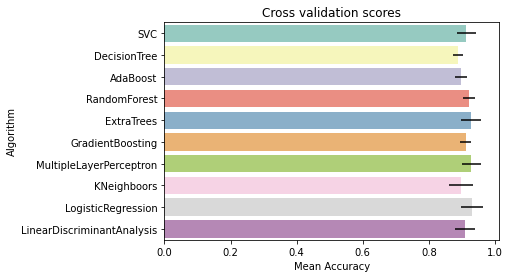

In [ ]:
import seaborn as sns
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
model1.score(X_test,y_test)

0.9335106382978723

### Applying Gradient Boost Classifier

In [ ]:
model1=GradientBoostingClassifier(n_estimators=200000,max_depth=4,learning_rate=0.01)

In [ ]:
model1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": [100,200,300,500],
          "max_depth": [None],
          "learning_rate": [1, 0.1, 0.01, 0.001]
}
model2=GradientBoostingClassifier()

gsas = GridSearchCV(model2, params, cv = 5, verbose = 1,scoring="accuracy", n_jobs= 4)
gsas.fit(x1_train,y1_train)
gsas.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   58.0s finished


0.9149178255372945

### Applying Extra Trees Classifier

In [ ]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x1_train,y = y1_train)

ExtC_best = gsExtC.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.1s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:   55.0s finished


In [ ]:
gsExtC.best_score_

0.9432522123893806

### Applying Logistic Regression

In [ ]:
clf = LogisticRegression()
#model3 = clf.fit(x1_train, y1_train)
#model3.score(x_test,y_test)

clf_param_grid = {"warm_start": [True],
                  "solver": ['saga'],
                  ##"l1_ratio": [],
                  #"dual": [True],
                  "class_weight": ['balanced'],
                  "random_state" : [False],
                  
     }

gsclf = GridSearchCV(clf,param_grid = clf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsclf.fit(x1_train,y = y1_train)
clf_best = gsclf.best_estimator_
gsclf.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9450537294563844

## Best Model Accuracy achieved by Logistic Regression

In [ ]:
#clf = LogisticRegression()
model3 = LogisticRegression(solver='newton-cg',max_iter=100).fit(x1_train, y1_train)
model3.score(x_test,y_test)

0.9441489361702128

# Predicting on New Data

In [ ]:
new_test_data = pd.read_csv("/content/drive/MyDrive/machine_learning_india_ai_challenge-dataset/TEST.csv")

In [ ]:
test_new=new_test_data.drop(["Index"],axis="columns")
target = model2.predict(test_new)

In [ ]:
res = pd.DataFrame(target)  
res.index = test_new.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)  